# Imports

In [1]:
# imports
import numpy as np
import pyagrum as gum
import pyagrum.lib.notebook as gnb

# Tests

In [2]:
limid = gum.InfluenceDiagram()
limid.addChanceNode(gum.LabelizedVariable("A", "a", 2))
limid.addChanceNode(gum.LabelizedVariable("B", "b", 2))
limid.addArc(limid.idFromName("A"), limid.idFromName("B"))

In [3]:
limid

(pyagrum.InfluenceDiagram@0x5573e4238a20) Influence Diagram{
  chance: 2,
  utility: 0,
  decision: 0,
  arcs: 1,
  domainSize: 4
}

## Bayesian network tutorial

In [30]:
bn = gum.BayesNet("Water sprinkler")
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0, mem: 0o}


In [31]:
idC = bn.add(gum.LabelizedVariable("c", "Cloudy?", 3))
print(idC)
print(bn.variable(idC))

0
c:Labelized({0|1|2})


In [32]:
idS, idR, idW = [bn.add(name, 2) for name in "srw"]
# bn.add(name, 2) === nb.add(gum.LabelizedVariable(name, name, 2))
print(idS, idR, idW)
print(bn)

1 2 3
BN{nodes: 4, arcs: 0, domainSize: 24, dim: 5, mem: 72o}


In [36]:
print(f"{bn.variable(idC) = }")
print(f"{bn.variable(idS) = }")
print(f"{bn['s'] = }")
print(f"{bn[0] = }")
print(f"{idS = }")
print(f"{bn.idFromName('w') = }")
print(f"{bn.variable(idR).name() = }")

bn.variable(idC) = (pyagrum.DiscreteVariable@0x5573e43a9870) c:Labelized({0|1|2})
bn.variable(idS) = (pyagrum.DiscreteVariable@0x5573e43a2de0) s:Range([0,1])
bn['s'] = (pyagrum.DiscreteVariable@0x5573e43a2de0) s:Range([0,1])
bn[0] = (pyagrum.DiscreteVariable@0x5573e43a9870) c:Labelized({0|1|2})
idS = 1
bn.idFromName('w') = 3
bn.variable(idR).name() = 'r'


In [44]:
try:
    for link in [(idC, idR), ('c', 's'), (1, 3), (idR, idW)]:
        bn.addArc(*link)
except:
    pass
print(bn)

BN{nodes: 4, arcs: 4, domainSize: 24, dim: 12, mem: 184o}


In [46]:
bn

(pyagrum.BayesNet@0x5573e43a3d70) BN{nodes: 4, arcs: 4, domainSize: 24, dim: 12, mem: 184o}

In [47]:
bn.cpt(idC).fillWith([0.2, 0.5, 0.3])

(pyagrum.Tensor@0x7fa59009b8f0) 
  c                          |
0        |1        |2        |
---------|---------|---------|
 0.2000  | 0.5000  | 0.3000  |

In [52]:
bn.cpt(idS).names

('s', 'c')

In [59]:
bn.cpt(idS)[:] = [[0.4, 0.6], [0.4, 0.6], [0.9, 0.1]]

In [70]:
print(bn.cpt(idR).names)
bn.cpt(idR)[:] = [[0.9, 0.1], [0.6, 0.4], [0.05, 0.95]]

('r', 'c')


In [64]:
bn.cpt("w").names

('w', 's', 'r')

In [68]:
bn.cpt("w")[0, 0, :] = [1, 0] # r = 0, 2 = 0
bn.cpt("w")[{'s':0, 'r':1}] = [0.10, 0.90] # s = 0, r = 1
bn.cpt("w")[{'s':1, 'r':0}] = [0.3, 0.7] # s = 1, r = 0
bn.cpt("w")[{'s':1, 'r':1}] = [0.01, 0.99] # s = 1, r = 1
bn.cpt("w")

(pyagrum.Tensor@0x5573e42c4190) 
             ||  w                |
s     |r     ||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 0.0000  |
1     |0     || 0.3000  | 0.7000  |
0     |1     || 0.1000  | 0.9000  |
1     |1     || 0.0100  | 0.9900  |

In [71]:
print(bn)

BN{nodes: 4, arcs: 4, domainSize: 24, dim: 12, mem: 184o}


In [72]:
ei = gum.LazyPropagation(bn)

In [75]:
ei.makeInference()
print(ei.posterior("w"))


  w                |
0        |1        |
---------|---------|
 0.3284  | 0.6716  |



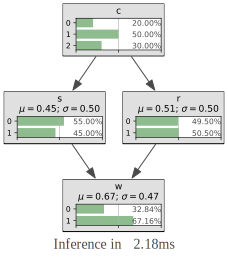

In [76]:
gnb.showInference(bn, evs={})

## Conditional independence

In [87]:
def testIndependence(bn, x, y, knowing=[]):
    res = "" if bn.isIndependent(x, y, knowing) else " NOT"
    given = "." if len(knowing) == 0 else f" given {knowing}."
    print(f"{x} and {y} are{res} independent{given}")
    return

In [90]:
bnIndependence = gum.fastBN("A->B<-C->D->E<-F<-A;C->G<-H<-I->J")
bnIndependence

(pyagrum.BayesNet@0x5573e4676f10) BN{nodes: 10, arcs: 10, domainSize: 1024, dim: 23, mem: 368o}

In [104]:
testIndependence(bnIndependence, "A", "C") # no active colliders
testIndependence(bnIndependence, "A", "C", "B") # collider at B
testIndependence(bnIndependence, "A", "C", "E") # collider at E
testIndependence(bnIndependence, "A", "I", ["E", "G"]) # collider at E, G

testIndependence(bnIndependence, "J", "H") # unconditioned fork
testIndependence(bnIndependence, "J", "H", "I") # conditioned fork

testIndependence(bnIndependence, "A", "E") # simple chain
testIndependence(bnIndependence, "A", "E", "F") # simple chain with the parent of E known

testIndependence(bnIndependence, "I", "E") # no direct chain
testIndependence(bnIndependence, "I", "E", ["C", "A"]) # still independent

A and C are independent.
A and C are NOT independent given B.
A and C are NOT independent given E.
A and I are NOT independent given ['E', 'G'].
J and H are NOT independent.
J and H are independent given I.
A and E are NOT independent.
A and E are independent given F.
I and E are independent.
I and E are independent given ['C', 'A'].


In [108]:
gum.MarkovBlanket(bnIndependence, "C")

<pyagrum.pyagrum.MarkovBlanket; proxy of <Swig Object of type 'gum::MarkovBlanket *' at 0x7fa55f1970f0> >

In [109]:
gum.MarkovBlanket(bnIndependence, "E")

<pyagrum.pyagrum.MarkovBlanket; proxy of <Swig Object of type 'gum::MarkovBlanket *' at 0x7fa55f1966a0> >

In [112]:
bnIndependence.minimalCondSet("B", ["A", "G", "H", "J"]) # A, G, H

{0, 6, 7}

## LIMIDs 

In [121]:
oilLIMID = gum.InfluenceDiagram()

idOC = oilLIMID.addChanceNode(gum.LabelizedVariable("oc", "Oil Contents", ["Dry", "Wet", "Soaking"]))
idTR = oilLIMID.addChanceNode(gum.LabelizedVariable("tr", "TestResult", ["Closed", "Open", "Diffuse"]))

idTest = oilLIMID.addDecisionNode(gum.LabelizedVariable("t", "Testing", ["Yes", "No"]))
idDrill = oilLIMID.addDecisionNode(gum.LabelizedVariable("d", "Drilling", ["Yes", "No"]))

idUtil1 = oilLIMID.addUtilityNode(gum.LabelizedVariable("Cost"))
idUtil2 = oilLIMID.addUtilityNode(gum.LabelizedVariable("Reward"))

InvalidArgument: [pyAgrum] Invalid argument: Utility var have no state ( which implicates a single label for data output reasons ).

In [116]:
oilLIMID.addArc(idOC, idTR)
oilLIMID.addArc(idOC, idUtil2)

oilLIMID.addArc(idTest, idUtil1)
oilLIMID.addArc(idTest, idTR)
oilLIMID.addArc(idTest, idUtil2)

oilLIMID.addArc(idTR, idDrill)

oilLIMID.addArc(idDrill, idUtil2)

In [117]:
oilLIMID.cpt(idOC).fillWith([0.5, 0.3, 0.2])

(pyagrum.Tensor@0x5573e4651e70) 
  oc                         |
Dry      |Wet      |Soaking  |
---------|---------|---------|
 0.5000  | 0.3000  | 0.2000  |

In [118]:
oilLIMID

(pyagrum.InfluenceDiagram@0x5573e4661f40) Influence Diagram{
  chance: 2,
  utility: 0,
  decision: 4,
  arcs: 7,
  domainSize: 144
}